No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


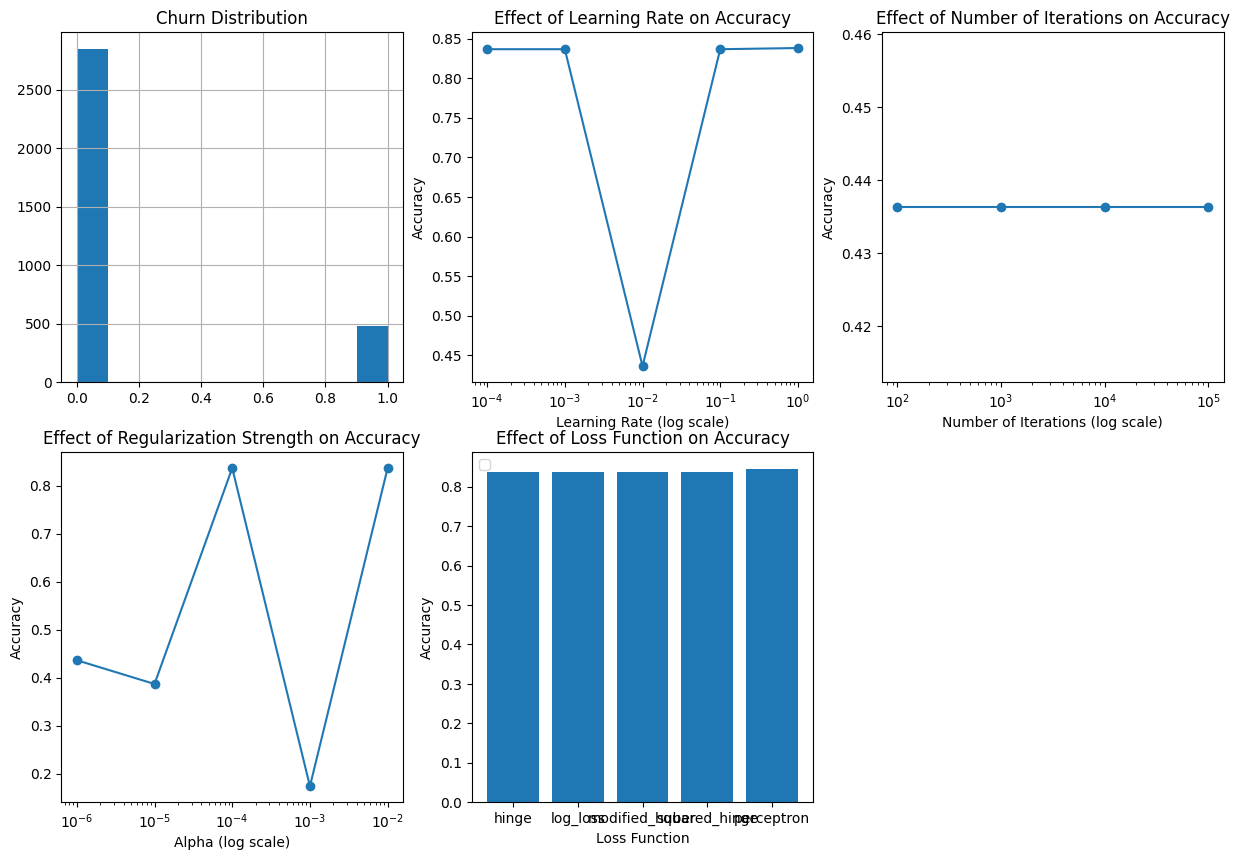

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
from sklearn.metrics import accuracy_score

# Load dataset
dataset = pd.read_csv("dataset.csv")

# Convert categorical variables to binary
dataset['Churn?'] = np.where(dataset['Churn?'] == 'True.', 1, 0)
dataset['Int\'l Plan'] = np.where(dataset['Int\'l Plan'] == 'yes', 1, 0)
dataset['VMail Plan'] = np.where(dataset['VMail Plan'] == 'yes', 1, 0)

# Drop unnecessary columns
dataset = dataset.drop(columns=['Phone', 'State', 'Area Code'])

# Split the dataset
features = dataset.iloc[:, :-1]
labels = dataset.iloc[:, -1]
features_train, features_test, labels_train, labels_test = skms.train_test_split(features, labels, test_size=0.2, shuffle=False)

# Vary alpha (regularization strength)
alphas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
accuracy_alpha = []

for alpha in alphas:
    LR = sklm.SGDClassifier(random_state=0, shuffle=True, learning_rate="constant", eta0=0.01, max_iter=100000, fit_intercept=True, penalty='l2', alpha=alpha, loss="log_loss")
    LR.fit(features_train, labels_train)
    prediction = LR.predict(features_test)
    accuracy = accuracy_score(labels_test, prediction)
    accuracy_alpha.append(accuracy)

# Vary loss function
loss_functions = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']
accuracy_loss = []

for loss_function in loss_functions:
    LR = sklm.SGDClassifier(random_state=0, shuffle=True, learning_rate="constant", eta0=0.01, max_iter=100000, fit_intercept=True, penalty='l2', alpha=1e-4, loss=loss_function)
    LR.fit(features_train, labels_train)
    prediction = LR.predict(features_test)
    accuracy = accuracy_score(labels_test, prediction)
    accuracy_loss.append(accuracy)

# Plotting
plt.figure(figsize=(15, 10))

# Original histogram
plt.subplot(2, 3, 1)
dataset['Churn?'].hist()
plt.title('Churn Distribution')

# Learning rate plot
plt.subplot(2, 3, 2)
plt.plot(learning_rates, accuracy_lr, marker='o')
plt.xscale('log')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate on Accuracy')

# Iterations plot
plt.subplot(2, 3, 3)
plt.plot(iterations, accuracy_iter, marker='o')
plt.xscale('log')
plt.xlabel('Number of Iterations (log scale)')
plt.ylabel('Accuracy')
plt.title('Effect of Number of Iterations on Accuracy')

# Alpha plot
plt.subplot(2, 3, 4)
plt.plot(alphas, accuracy_alpha, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization Strength on Accuracy')

# Loss function plot
plt.subplot(2, 3, 5)
plt.bar(loss_functions, accuracy_loss)
plt.xlabel('Loss Function')
plt.ylabel('Accuracy')
plt.title('Effect of Loss Function on Accuracy')

plt.tight_layout()
plt.show()
